In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # LogisticRegression Model from sklearn
from sklearn.metrics import classification_report, confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sample1 = pd.DataFrame({ 'A': [14 , 6,float('nan'),9,float('nan')]  ,
                        'B': [float('nan') , 6,float('nan'),9,float('nan')]
                        
                         })
sample1

,A,B
0,14.0,NaN
1,6.0,6.0
2,NaN,NaN
3,9.0,9.0
4,NaN,NaN


In [12]:
sample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       2 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes


In [13]:
sample1.ffill(inplace= True)
sample1

,A,B
0,14.0,NaN
1,6.0,6.0
2,6.0,6.0
3,9.0,9.0
4,9.0,9.0


In [14]:
sample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       4 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes


In [15]:
fraud_txn_df = pd.read_csv("fraud_txn.csv")
fraud_txn_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-12-16 12:40:56,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,M,673 Delgado Burg,...,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0
1,1,2019-11-10 21:29:24,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,M,7290 Ashlee Keys,...,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1
2,2,2019-12-31 22:11:08,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,F,9824 Mitchell Run,...,44.2415,-121.0113,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1
3,3,2020-04-09 17:23:25,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,F,372 Jeffrey Course,...,41.1558,-101.1360,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0
4,4,2019-12-22 15:03:23,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,M,0110 Ashley Forest,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0


In [16]:
#Drop unnecessary columns. Demographic columns is not needed.
fraud_txn_df.drop(columns=['Unnamed: 0','trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
                  , inplace=True) # Update the same dataframe - inplace=True
fraud_txn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      15506 non-null  int64  
 1   merchant    15506 non-null  object 
 2   category    15506 non-null  object 
 3   amt         15506 non-null  float64
 4   gender      15506 non-null  object 
 5   zip         15506 non-null  int64  
 6   lat         15506 non-null  float64
 7   long        15506 non-null  float64
 8   city_pop    15506 non-null  int64  
 9   unix_time   15506 non-null  int64  
 10  merch_lat   15506 non-null  float64
 11  merch_long  15506 non-null  float64
 12  is_fraud    15506 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.5+ MB


In [17]:
import pandas as pd
import numpy as np
# If you prefer miles, set r = 3958.8
def haversine_np(lat1, lon1, lat2, lon2, r=6371.0):
    # convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return r * c

# Example DataFrame
df = pd.DataFrame({
    'lat': [58.988831],
    'long': [-15.44242],
    'merch_lat': [38.988831],
    'merch_long': [-75.44242]
})

df['transaction_distance'] = haversine_np(
    df['lat'], df['long'], df['merch_lat'], df['merch_long']
)

print(df)

         lat      long  merch_lat  merch_long  transaction_distance
0  58.988831 -15.44242  38.988831   -75.44242           4705.105969


In [18]:
fraud_txn_df['is_fraud']

0        0
1        1
2        1
3        0
4        0
        ..
15501    1
15502    0
15503    1
15504    1
15505    1
Name: is_fraud, Length: 15506, dtype: int64

In [26]:
# Fraud trends over time
# Ensure datetime parsing
fraud_txn_df = pd.read_csv("fraud_txn.csv")

fraud_txn_df['trans_date_trans_time'] = pd.to_datetime(fraud_txn_df['trans_date_trans_time'], errors='coerce')
print("Fraud data shape : ",fraud_txn_df['trans_date_trans_time'].shape)

# Drop rows with invalid timestamps or fraud flag
fraud_txn_time_dat_df = fraud_txn_df.dropna(subset=['trans_date_trans_time', 'is_fraud'])

# Set time-based index for easy resampling
fraud_txn_time_dat_df = fraud_txn_time_dat_df.set_index('trans_date_trans_time')

print("Fraud data shape after indexing : ",fraud_txn_df['trans_date_trans_time'].shape)

Fraud data shape :  (15506,)
Fraud data shape after indexing :  (15506,)


In [27]:
fraud_txn_time_dat_df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-12-16 12:40:56,0,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,M,673 Delgado Burg,Greenwich,...,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0
2019-11-10 21:29:24,1,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,M,7290 Ashlee Keys,Kissee Mills,...,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1
2019-12-31 22:11:08,2,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,F,9824 Mitchell Run,Powell Butte,...,44.2415,-121.0113,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1
2020-04-09 17:23:25,3,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,41.1558,-101.1360,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0
2019-12-22 15:03:23,4,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,M,0110 Ashley Forest,Tekoa,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0


In [28]:
daily = fraud_txn_time_dat_df.groupby(pd.Grouper(freq='D'))['is_fraud'].agg(['sum', 'count'])
daily.head()

,sum,count
trans_date_trans_time,,
2019-01-01,0,14
2019-01-02,7,8
2019-01-03,12,23
2019-01-04,13,22
2019-01-05,13,21


In [29]:
daily.rename(columns={'sum': 'fraud_count', 'count': 'total_count'}, inplace=True)
# rate of fraud count i.e. (sum of fraud count per time instance of day) / (total transactions per the same time instance of day)
daily['fraud_rate'] = daily['fraud_count'] / daily['total_count']

print(daily.head())
print(daily.count)

                       fraud_count  total_count  fraud_rate
trans_date_trans_time                                      
2019-01-01                       0           14    0.000000
2019-01-02                       7            8    0.875000
2019-01-03                      12           23    0.521739
2019-01-04                      13           22    0.590909
2019-01-05                      13           21    0.619048
<bound method DataFrame.count of                        fraud_count  total_count  fraud_rate
trans_date_trans_time                                      
2019-01-01                       0           14    0.000000
2019-01-02                       7            8    0.875000
2019-01-03                      12           23    0.521739
2019-01-04                      13           22    0.590909
2019-01-05                      13           21    0.619048
...                            ...          ...         ...
2020-06-17                      35           44    0.795455
2020-06

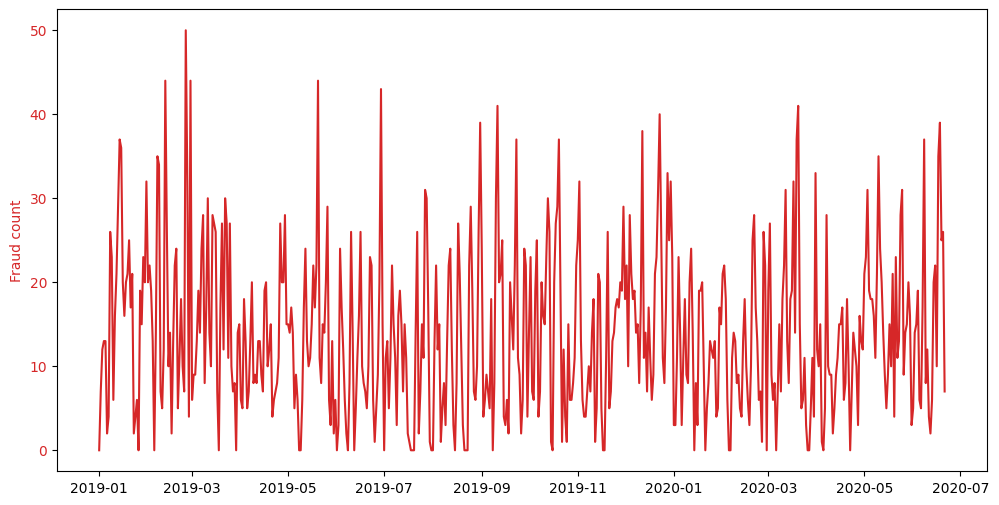

In [30]:
# Plot fraud count and rate over time
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(daily.index, daily['fraud_count'], color='tab:red', label='Fraud count (daily)')
ax1.set_ylabel('Fraud count', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')